In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.animation
from classify_heatmaps import var_descriptions

# Obtain data from CSV
df = pd.read_csv('Asteroid_au_to_km.csv', header=0, index_col=0)
cat_inds = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

/Users/Andrea/anaconda3/envs/ECE143/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
# Check from certain variables with different correlations from PHA to non-PHA
subsets = [['a', 'e'], # Major axis, Orbit shape
           ['q', 'e'], # Closest sun distance, Orbit shape
           ['ad', 'e'], # Farthest sun distance, Orbit shape
           ['moid', 'e'], # Minimum Orbit Intersection Distance, Orbit shape
           ['n', 'e'], # Angular orbit speed, Orbit shape
           ['moid', 'H'], # Minimum Orbit Intersection Distance, Absolute Magnitude
           ['H', 'albedo'], # Absolute Magnitude, Geometric albedo
           ['a', 'n'], # Major axis, Angular orbit speed
           ['e', 'n'], # Orbit shape, Angular orbit speed
           ['q', 'n'], # Closest sun distance, Angular orbit speed
           ['ad', 'n'], # Farthest sun distance, Angular orbit speed
           ['data_arc', 'n_obs_used'] # Major axis, Angular orbit speed (optional)
          ]

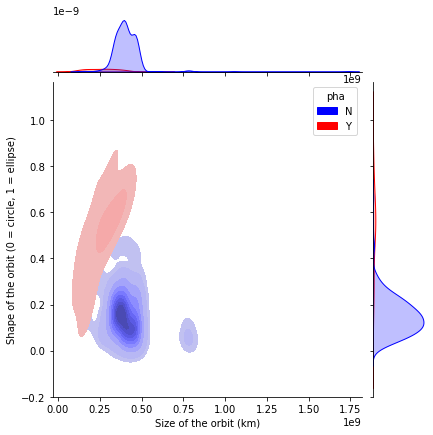

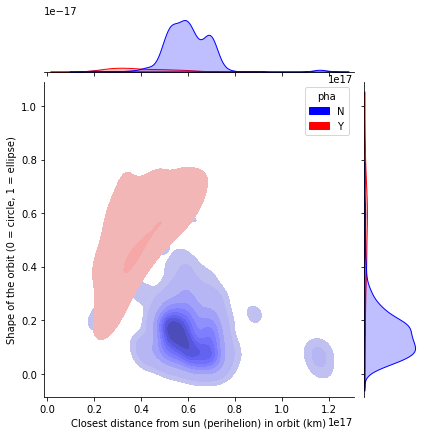

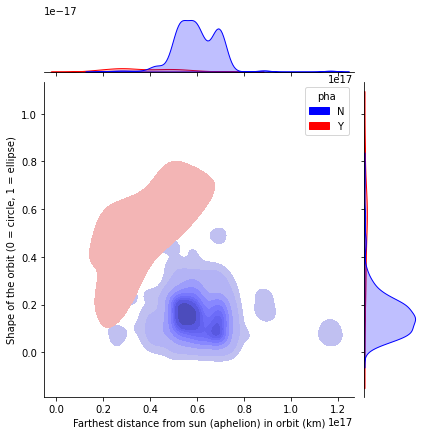

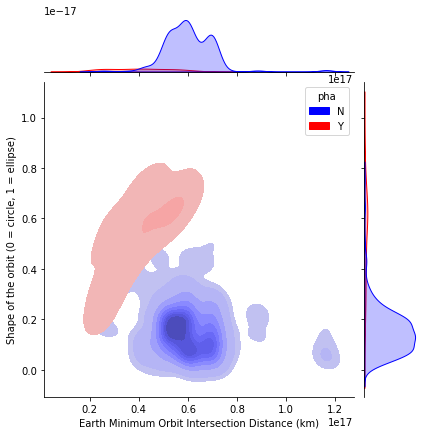

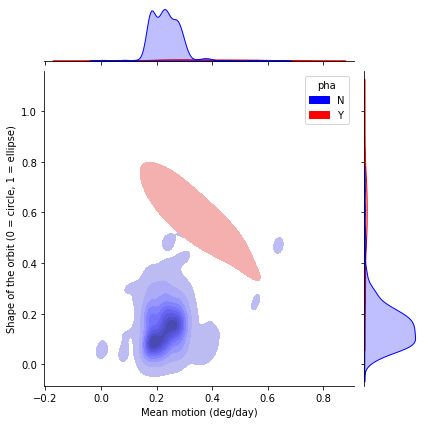

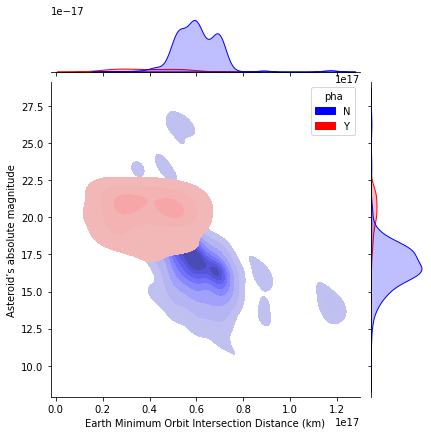

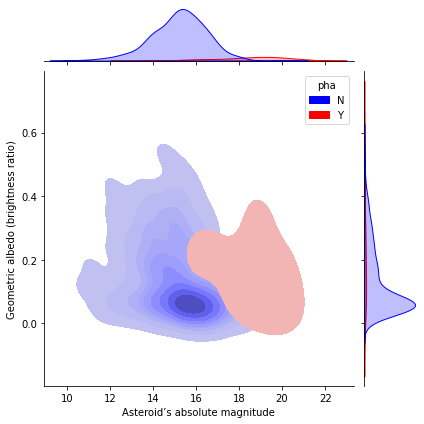

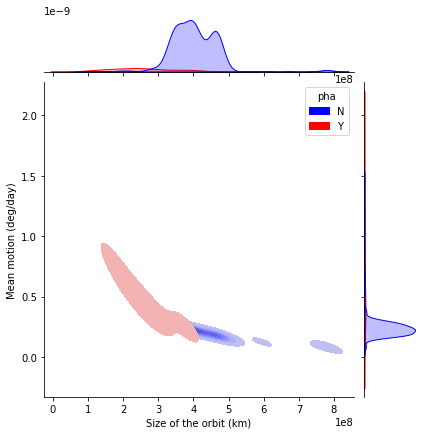

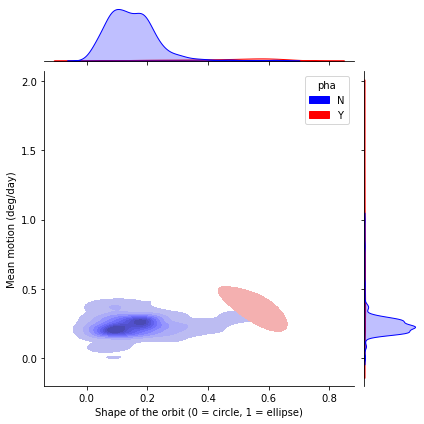

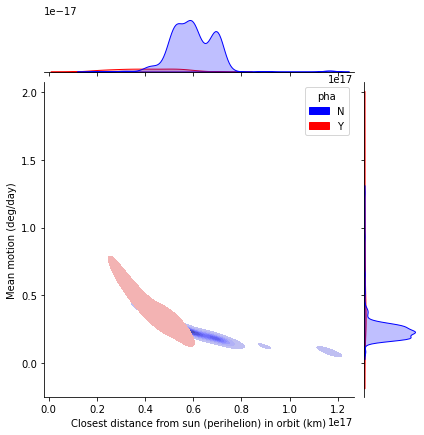

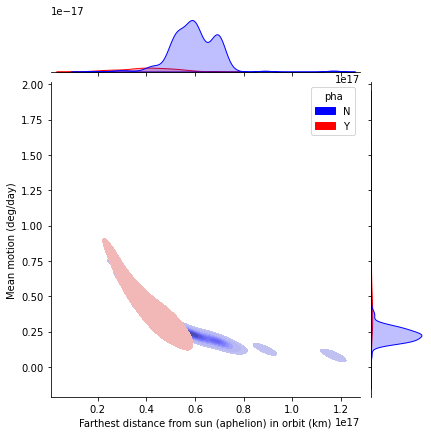

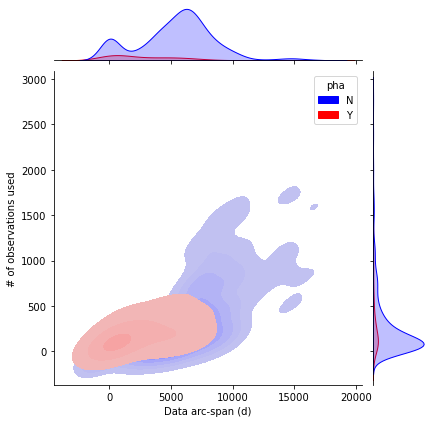

In [16]:
for corrs in subsets:
    parameters = corrs + ['pha']
    og_paracols = df.loc[:, parameters].dropna()
    
    # Sample from non-hazardous and hazardous asteroids
    n_cols = og_paracols[og_paracols['pha'] == 'N'].sample(900)
    h_cols = og_paracols[og_paracols['pha'] == 'Y'].sample(100)
    paracols = pd.concat([h_cols, n_cols])

    # Obtain values for each label
    x_label, y_label = parameters[:2]

    # Remove extreme outliers
    x_values, y_values = paracols[x_label], paracols[y_label]
    paracols['z_score_x'] = scipy.stats.zscore(x_values)
    paracols.drop(paracols[(np.abs(paracols['z_score_x']) > 3)].index, inplace=True)

    # Set up joint KDE plot
    plot = sns.jointplot(x=x_values, y=y_values, hue=paracols['pha'], palette=['blue', 'red'],
                  hue_order=['N', 'Y'], kind='kde', fill=True)
    plot.set_axis_labels(var_descriptions[x_label].split(':')[0],
                         var_descriptions[y_label].split(':')[0])
        
    
plt.show()